# Sentiment Analysis of Brand Mentions on Twitter

### Project Overview
Brand reputation and customer perception are key drivers of business success in today’s digital world. Social media platforms like Twitter have become essential for companies to gauge public opinion about their products and services. This project focuses on analyzing sentiments in tweets directed at major brands, specifically Apple and Google and their products, such as iPads, iPhones, Android devices, and related services.

Through sentiment analysis, we aim to classify customer feedback as positive, negative, or No emotion (neutral), providing valuable insights that can help businesses improve customer experience and brand positioning.


### Business Problem
Companies like Apple and Google need to understand how consumers feel about their products in real time. Negative sentiments can indicate issues with product quality, customer service, or software performance, while positive sentiments highlight strengths and customer satisfaction.

By analyzing sentiment trends, companies can:

- Identify brand strengths and leverage them for marketing.
- Detect customer dissatisfaction early and address concerns.
- Compare sentiment across different products and services.
- Track public perception over time and adjust branding strategies.
- Know which brands or products receive the most positive or negative sentiment
- Understand What common themes appear in negative tweets, and how can they be addressed

### Data Understanding
The dataset consists of tweets mentioning brands and their products, along with labeled sentiment categories. The key data attributes include:

- tweet_text: The content of the tweet.
- brand_sentiment: The sentiment label (Positive, Negative, or No emotion).
- motion_in_tweet_is_directed_at: The specific brand or product being mentioned (e.g., iPad, iPhone, Google services).
- tweet_length: The number of characters in the tweet.

Potential Data Challenges:
Imbalanced Sentiment Distribution – More positive or neutral tweets compared to negative ones.
Short Text Length – Tweets are often brief, making sentiment detection harder.
Sarcasm & Context Ambiguity – Sentiment may be difficult to determine from text alone.


### Objective
The primary objective of this project is
- To analyze sentiment in tweets related to Apple and Google brands to provide data-driven insights for business decision-making.
- Classify sentiment as positive, negative, or No emotion(neutral).
- Perform Exploratory Data Analysis (EDA) to understand sentiment trends.
- Train and evaluate sentiment classification models using machine learning 
- Provide business recommendations based on sentiment trends and patterns.


#### Metrics of Success
To evaluate the success of this sentiment analysis project, we will measure:

Sentiment Classification Accuracy – How well the model predicts sentiment correctly.
Precision & Recall – To measure performance, especially in detecting negative sentiments accurately.
Insight Quality – The ability to extract useful trends that help improve brand perception.
Visualization Clarity – How well sentiment trends and patterns are communicated to stakeholders.


#### Loading the required libraries

In [1]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
from sklearn.preprocessing import OneHotEncoder
from wordcloud import WordCloud, STOPWORDS
from sklearn.svm import SVC  # Import SVC
from sklearn.naive_bayes import MultinomialNB  # Import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import VotingClassifier
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# Ensure required NLTK resources are downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
from nltk.stem import WordNetLemmatizer
import summarytools as st


C:\Users\Administrator\anaconda3\envs\learn-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


#### Loading the data set

In [2]:
#read the csv and display the first 5 rows
Tweets_df= pd.read_csv('judge-1377884607_tweet_product_company.csv',encoding='ISO-8859-1')
Tweets_df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
#check for the shape of the data set
print(f'This dataset has {Tweets_df.shape[0]} rows and {Tweets_df.shape[1]} columns')

This dataset has 9093 rows and 3 columns


In [4]:
Tweets_df.columns
target_column = Tweets_df.columns[-1]  # Index 17 for 'fraudulent'

# Print the result
print(f"The target variable is '{target_column}' column.")

The target variable is 'is_there_an_emotion_directed_at_a_brand_or_product' column.


In [5]:
#rename our taret column

Tweets_df = Tweets_df.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'brand_sentiment'})
Tweets_df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,brand_sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [6]:
st.dfSummary(Tweets_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,tweet_text[object],"1. RT @mention Marissa Mayer: Goo2. RT @mention Google to Launch M3. RT @mention Marissa Mayer: Goo4. RT @mention Google to Launch M5. Before It Even Begins, Apple W6. Google to Launch Major New Soc7. Win free ipad 2 from webdoc.co8. Win free iPad 2 from webdoc.co9. Really enjoying the changes in10. Oh. My. God. The #SXSW app for11. other","5 (0.1%)4 (0.0%)4 (0.0%)3 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)2 (0.0%)9,065 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAyZJREFUeJzt3D1qAlEYRuF7RfLTKGHAJSR7cBFps/fswiY/lcEiWzgDzvNU6WaKQz4EX+f1eh1Q2CVPAbFREhsZsZERGxmxkREbGbGRERsZsZHZzTnf5pxP3SPZ8n+21zHG49ovwv1zRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNNLbPMcZv90i2avoVIyrOKBmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZOYY43mM8dA9kq3aL8vyfjgcXtZ+Ee7f/hba+Xz+Ph6PP2u/DPfrcrk87W9/3EI7nU5fa78Q980HBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjL7/69/dI9ki26NzWVZPnx5koKvhZOxriLjAwIZsZERGxmxkREbGbGRERsZsZERG6PyB2PnS4LP+4TaAAAAAElFTkSuQmCC"">",1(0.0%)
2,emotion_in_tweet_is_directed_at[object],1. nan2. iPad3. Apple4. iPad or iPhone App5. Google6. iPhone7. Other Google product or servic8. Android App9. Android10. Other Apple product or service,"5,802 (63.8%)946 (10.4%)661 (7.3%)470 (5.2%)430 (4.7%)297 (3.3%)293 (3.2%)81 (0.9%)78 (0.9%)35 (0.4%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADnCAYAAAAJgSQ2AAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA4hJREFUeJzt3UFqE2EAhuE/pYhuUkqgh8khPKyHyG1KaRZWuokMdKkiOnkzmTzPQrpLwNeZZPi/ujmdTgMKd8mrgNgoiY2M2MiIjYzYyIiNjNjIiI3MZozxZYzxqXtJ/uD9dDq9jZW63+12X7fb7eOl3whjHI/Hl81m822twd1Poe33+7eHh4cfl34zt+z19fXz4XB4fH5+nu4y64xt+mMK7enp6ful3wxj+kizWr4gkBEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmx0Z76mI63dC/Jr9zC38H9dGBvOke19uMt1+B4PL5Mp3XHSjkWvizvaz2lO9n4LUZc05Vt1f8aWdDgZe0jDRYyeLmFkQbLGrz4Fstf8VCXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiN6xi83MJIgwUNXtY+0mA+joWTMXhhsVc2VzGawYtxC8ngxbiFevBi3MI/81CXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNhY3rrKkop0XWVJxf+wQSBjXcWirmyuZjTrKosqknWVRRX1usqiill4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxMYyBi9GLqSDFyMX5uJYOBmDFxZzZXNVoxm8GLuQDF6MXagHL8YuzMZDXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNi4/eDF2IR28GLswJ8fCyRi8kPEFgYvfRt0+adZVVlUk6yqrKup1lVUVs/MFgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjcutq6yqSNdVVlWcg2PhZKyryLiykTF4IWPwQsbghYyHumTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGQMXsgYvJBxLJyMwQsZXxDIb6PDbZNkXTX9YE3Fud1N66qPKd/v/s9RmIXPbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZstOuqj5+tqTgrx8LJWFeRcWUjY/BCxuCFjEcfZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IOBZOxuCFjCsbGYMXMgYvZDz6ICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy1lVkbBDIWFeR8ZmNjNjIiI2M2MiIjYzYyIiNUfkJaGm5yjEcgcMAAAAASUVORK5CYII="">","5,802(63.8%)"
3,brand_sentiment[object],1. No emotion toward brand or pro2. Positive emotion3. Negative emotion4. I can't tell,"5,389 (59.3%)2,978 (32.8%)570 (6.3%)156 (1.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABcCAYAAAB5jMeAAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAeVJREFUeJzt3UFqwkAAheFJkVI3ig

#### observation
Data Cleaning Needed to Remove duplicates and handle missing values in emotion_in_tweet_is_directed_at.

Sentiment Distribution: Most tweets are neutral (59.3%), followed by positive (32.8%), and fewer are negative (6.3%).

Brand Mentions: iPads, iPhones, Google, and Android are frequently mentioned, but many tweets lack brand-specific emotions.


In [7]:
#checking for mising values
Tweets_df.isnull().sum()

tweet_text                            1
emotion_in_tweet_is_directed_at    5802
brand_sentiment                       0
dtype: int64

In [8]:
# drop the missing row in tweet_text column and fill the 
Tweets_df = Tweets_df.dropna(subset=['tweet_text'])


In [9]:
#drop the feature with 63.8% NANS 
Tweets_df = Tweets_df.dropna(subset=['emotion_in_tweet_is_directed_at'])

In [10]:
#drop the category "I cant tell" from the labels
Tweets_df = Tweets_df.drop(Tweets_df[Tweets_df['brand_sentiment'] == "I can't tell"].index)


In [11]:
#drop the duplicates
Tweets_df=Tweets_df.drop_duplicates()
Tweets_df.head(5)

,tweet_text,emotion_in_tweet_is_directed_at,brand_sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [12]:
st.dfSummary(Tweets_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,tweet_text[object],1. .@wesley83 I have a 3G iPhone.2. RT @mention Google to launch n3. RT @mention google presentatio4. RT @mention Google previews up5. RT @mention Google route aroun6. RT @mention Google set to laun7. RT @mention Google tested 41 s8. RT @mention Google to Launch M9. RT @mention Google to Launch M10. RT @mention Google to Launch M11. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)3,263 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAyZJREFUeJzt3D1qAlEYRuF7RfLTKGHAJSR7cBFps/fswiY/lcEiWzgDzvNU6WaKQz4EX+f1eh1Q2CVPAbFREhsZsZERGxmxkREbGbGRERsZsZHZzTnf5pxP3SPZ8n+21zHG49ovwv1zRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNNLbPMcZv90i2avoVIyrOKBmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZOYY43mM8dA9kq3aL8vyfjgcXtZ+Ee7f/hba+Xz+Ph6PP2u/DPfrcrk87W9/3EI7nU5fa78Q980HBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjL7/69/dI9ki26NzWVZPnx5koKvhZOxriLjAwIZsZERGxmxkREbGbGRERsZsZERG6PyB2PnS4LP+4TaAAAAAElFTkSuQmCC"">",0(0.0%)
2,emotion_in_tweet_is_directed_at[object],1. iPad2. Apple3. iPad or iPhone App4. Google5. iPhone6. Other Google product or servic7. Android App8. Android9. Other Apple product or service,941 (28.8%)657 (20.1%)469 (14.3%)427 (13.0%)295 (9.0%)292 (8.9%)80 (2.4%)77 (2.4%)35 (1.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADPCAYAAADifqNtAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA1FJREFUeJzt3UFKG2EAhuGJhLbZKCJ4DA/gIXrYHsIDeA8pumjablIG3FhaMJa80995noWrglm8/GGG/7Obw+EwQeEs+S0gNkpiIyM2MmIjIzYyYiOzmaZpN03Th2ksPw+Hw37pD8FxtldXV5/Pz88vp4E8PT193Ww2XwQ3lu0c2u3t7f7i4uL7NIDHx8dPd3d3lw8PD/NpLLaBbOcfc2jX19ffpnHMX/0MxgMCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREb7a2P+drONIiRPisvbeeLiPP9sJGu7cyfeb6tu/Tn4DiuhZPZ+FsfrOVkc0KtyKKDF8OVdVls8GK4sj5LD16GeQLm33mpS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTExvsfvBiurM+igxfDlXVxLZyMwQsZDwi8i69RX5E06yrLKZJ1leUU9brKcooXPCCQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbEx9rrKcop0XWU5xe9cCydjXcXQJ5sTjWbwYuhCMngxdKEevBi68Ede6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsTHm4MXQhXTwYujC37gWTsbghSFONicYzeDFsIVk8GLYQj14MWzhKF7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREb//e6yoqKdF1lRcWxbBDIWFeRcbKRsa4iY11FxrqKjJe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEtnIzBC4uebE4smsGLIQvJ4MWQhXrwYsjCSXipS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsLLOuspoiXVdZTXEqNghkrKvIONnIWFeRsa4iY11FxktdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyLgWTsbghUVONicazeDF0IVTO5tDu7m5mZ4XVm/5ryDh9e/Zdrvdj9f9c3g7L3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI02tv1+/7H7lazV2XxD9/7+3qqKk7NBIGNdRcYDAhmxkREbGbGRERsZsTFVfgGHtNTYy8UinwAAAABJRU5ErkJggg=="">",0(0.0%)
3,brand_sentiment[object],1. Positive emotion2. Negative emotion3. No emotion toward brand or pro,"2,664 (81.4%)518 (15.8%)91 (2.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAX5JREFUeJzt20Fq20AAhtFRMaXd2ASDD+ND9LA9hG9jir1oSjYqOoS/Ecl7i2wn4C9RFOZf1nUdUPiWnAJjjGWM8XOM8X32N0LuY13X9/LAw/l8/nU8Ht/KQ5nv+Xz+WZbldxncYQvter2+n06nf9WhzPV4PH

### EDA

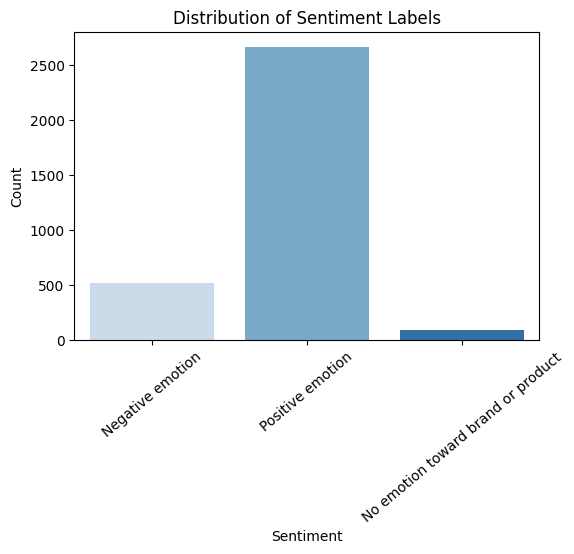

In [13]:
#Checking for the distibution of the sentiments in order to see if our data has imbalance

plt.figure(figsize=(6,4))

# Define a palette with different shades of the same color (e.g., "Blues")
sns.countplot(x="brand_sentiment", data=Tweets_df, hue="brand_sentiment", palette=sns.color_palette("Blues", n_colors=3), legend=False)

plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=40)  
plt.show()



#### Key Observations:
Positive Emotion Dominates

The majority of tweets express positive sentiment, indicating that most users are satisfied or happy with the brand or product.
 Negative Emotion is Present but Lower

A smaller portion of tweets convey negative sentiment, suggesting that some users have complaints or dissatisfaction, but they are significantly fewer than positive sentiments.
 Minimal Neutral/No Emotion Tweets

Only a few tweets fall into the "No emotion toward brand or product" category, meaning most tweets express a strong opinion rather than neutrality.

Since positive tweets are overwhelmingly higher,we will need to balance the dataset for machine learning models to ensure fair predictions.

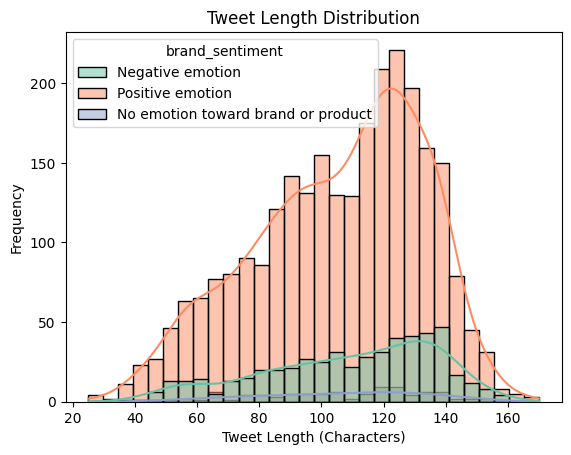

<Figure size 800x500 with 0 Axes>

In [14]:
###Helps detect outliers very short or long tweets

# Create a new column for tweet length
Tweets_df["tweet_length"] = Tweets_df["tweet_text"].apply(lambda x: len(str(x)))

# Plot the histogram correctly
sns.histplot(data=Tweets_df, x="tweet_length", hue="brand_sentiment", kde=True, bins=30, palette="Set2")

plt.title("Tweet Length Distribution")
plt.xlabel("Tweet Length (Characters)")
plt.ylabel("Frequency")
plt.figure(figsize=(8, 5))
plt.show()



#### Preprocesing

In [15]:
# Function to clean and preprocess the text
def preprocess_text(text):
    # Remove special characters, punctuation, and numbers
    #checking if the characters are not punctions or numericals
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    lemmatizer = WordNetLemmatizer()

    # Remove stopwords
    stop_words = set(stopwords.words('english')) | set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]

    # Apply stemming or lemmatization (using lemmatization here)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join the words back into a single string
    return ' '.join(tokens)


In [33]:
# Apply preprocessing to train and test data
#print(train_data.columns)
Tweets_df['cleaned_tweet_text'] = Tweets_df['tweet_text'].apply(preprocess_text)
Tweets_df.head()

,tweet_text,emotion_in_tweet_is_directed_at,brand_sentiment,tweet_length,cleaned_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,wesley g iphone hr tweeting riseaustin dead ne...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,jessedee know fludapp awesome ipadiphone app y...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,swonderlin wait ipad sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,sxsw hope year festival isnt crashy year iphon...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,sxtxstate great stuff fri sxsw marissa mayer g...


In [17]:
st.dfSummary(Tweets_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,tweet_text[object],1. .@wesley83 I have a 3G iPhone.2. RT @mention Google to launch n3. RT @mention google presentatio4. RT @mention Google previews up5. RT @mention Google route aroun6. RT @mention Google set to laun7. RT @mention Google tested 41 s8. RT @mention Google to Launch M9. RT @mention Google to Launch M10. RT @mention Google to Launch M11. other,"1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)1 (0.0%)3,263 (99.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAyZJREFUeJzt3D1qAlEYRuF7RfLTKGHAJSR7cBFps/fswiY/lcEiWzgDzvNU6WaKQz4EX+f1eh1Q2CVPAbFREhsZsZERGxmxkREbGbGRERsZsZHZzTnf5pxP3SPZ8n+21zHG49ovwv1zRsmIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNNLbPMcZv90i2avoVIyrOKBmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/BCxuCFjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmxkbGuImNdRcYZJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkDF7IGLyQcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrqKjDNKRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MgYvJAxeCHjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZMRGRmxkrKvIWFeRcUbJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MhYV5GxriLjjJIRGxmDFzIGL2ScUTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDijZOYY43mM8dA9kq3aL8vyfjgcXtZ+Ee7f/hba+Xz+Ph6PP2u/DPfrcrk87W9/3EI7nU5fa78Q980HBDJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjL7/69/dI9ki26NzWVZPnx5koKvhZOxriLjAwIZsZERGxmxkREbGbGRERsZsZERG6PyB2PnS4LP+4TaAAAAAElFTkSuQmCC"">",0(0.0%)
2,emotion_in_tweet_is_directed_at[object],1. iPad2. Apple3. iPad or iPhone App4. Google5. iPhone6. Other Google product or servic7. Android App8. Android9. Other Apple product or service,941 (28.8%)657 (20.1%)469 (14.3%)427 (13.0%)295 (9.0%)292 (8.9%)80 (2.4%)77 (2.4%)35 (1.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADPCAYAAADifqNtAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAA1FJREFUeJzt3UFKG2EAhuGJhLbZKCJ4DA/gIXrYHsIDeA8pumjablIG3FhaMJa80995noWrglm8/GGG/7Obw+EwQeEs+S0gNkpiIyM2MmIjIzYyYiOzmaZpN03Th2ksPw+Hw37pD8FxtldXV5/Pz88vp4E8PT193Ww2XwQ3lu0c2u3t7f7i4uL7NIDHx8dPd3d3lw8PD/NpLLaBbOcfc2jX19ffpnHMX/0MxgMCGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREb7a2P+drONIiRPisvbeeLiPP9sJGu7cyfeb6tu/Tn4DiuhZPZ+FsfrOVkc0KtyKKDF8OVdVls8GK4sj5LD16GeQLm33mpS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTExvsfvBiurM+igxfDlXVxLZyMwQsZDwi8i69RX5E06yrLKZJ1leUU9brKcooXPCCQERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbEx9rrKcop0XWU5xe9cCydjXcXQJ5sTjWbwYuhCMngxdKEevBi68Ede6pIRGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsTHm4MXQhXTwYujC37gWTsbghSFONicYzeDFsIVk8GLYQj14MWzhKF7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREb//e6yoqKdF1lRcWxbBDIWFeRcbKRsa4iY11FxrqKjJe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEtnIzBC4uebE4smsGLIQvJ4MWQhXrwYsjCSXipS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsLLOuspoiXVdZTXEqNghkrKvIONnIWFeRsa4iY11FxktdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyLgWTsbghUVONicazeDF0IVTO5tDu7m5mZ4XVm/5ryDh9e/Zdrvdj9f9c3g7L3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI02tv1+/7H7lazV2XxD9/7+3qqKk7NBIGNdRcYDAhmxkREbGbGRERsZsTFVfgGHtNTYy8UinwAAAABJRU5ErkJggg=="">",0(0.0%)
3,brand_sentiment[object],1. Positive emotion2. Negative emotion3. No emotion toward brand or pro,"2,664 (81.4%)518 (15.8%)91 (2.8%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOnRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjEwLjAsIGh0dHBzOi8vbWF0cGxvdGxpYi5vcmcvlHJYcgAAAAlwSFlzAAAPYQAAD2EBqD+naQAAAX5JREFUeJzt20Fq20AAhtFRMaXd2ASDD+ND9LA9hG9jir1oSjYqOoS/Ecl7i2wn4C9RFOZf1nUdUPiWnAJjjGWM8XOM8X32N0LuY13X9/LAw/l8/nU8Ht/KQ5nv+Xz+WZbldxncYQvter2+n06nf9WhzPV4PH

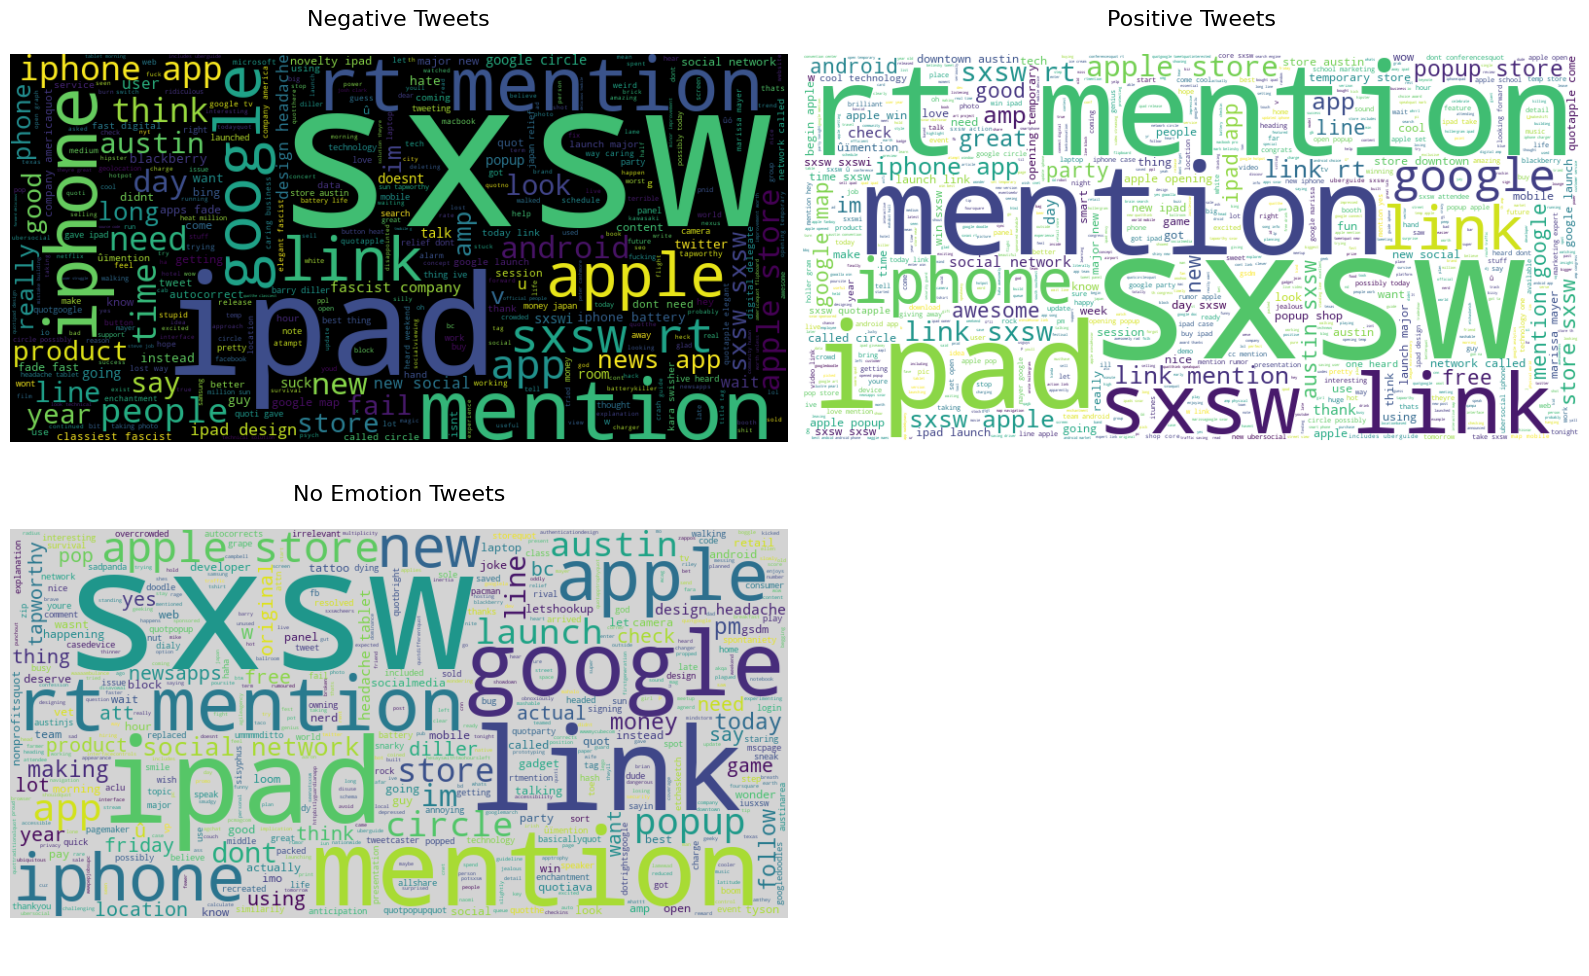

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Ensure sentiment labels match dataset
negative_text = ' '.join(Tweets_df[Tweets_df['brand_sentiment'] == 'Negative emotion']['cleaned_tweet_text'])
positive_text = ' '.join(Tweets_df[Tweets_df['brand_sentiment'] == 'Positive emotion']['cleaned_tweet_text'])
no_emotion_text = ' '.join(Tweets_df[Tweets_df['brand_sentiment'] == 'No emotion toward brand or product']['cleaned_tweet_text'])

# Handle empty text cases to avoid errors
texts = [negative_text, positive_text, no_emotion_text]
texts = [text if text.strip() else "No data available" for text in texts]  # Prevent empty word cloud errors

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Titles and background colors
titles = ['Negative Tweets', 'Positive Tweets', 'No Emotion Tweets']
bg_colors = ['black', 'white', 'lightgray']

# Generate and plot word clouds
for i, ax in enumerate(axes.flat[:3]):  # Use only the first 3 subplots
    ax.set_title(titles[i], fontsize=16, color='black', pad=20)
    wordcloud = WordCloud(width=800, height=400, max_words=3000, background_color=bg_colors[i], stopwords=set(STOPWORDS)).generate(texts[i])
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')

# Hide the fourth subplot
axes[1, 1].axis('off')

# Adjust layout to avoid title cutoff
plt.tight_layout()
plt.show()


#### Dominant Words (Larger words = Higher frequency):
- NEGATIVE TWEETS

"SXSW" – Likely a major topic of discussion in these negative tweets, possibly related to issues at the SXSW event.
"mention" & "rt" – Indicate retweets and mentions, meaning many users are discussing these issues widely.
Brand/Product Names: "ipad", "iphone", "apple", "google", "android" – These brands are frequently mentioned in a negative context.
Negative Words: "headache", "fail", "need", "design" – Suggest dissatisfaction with design, usability, or performance.

#### Topic modeling using BERT embeddings and K-Means clustering. 

Batches: 100%|███████████████████████████████| 103/103 [00:21<00:00,  4.84it/s]


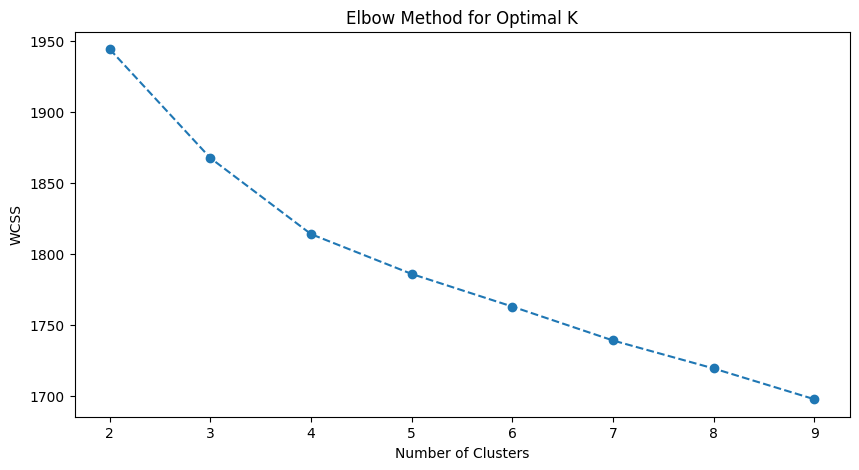

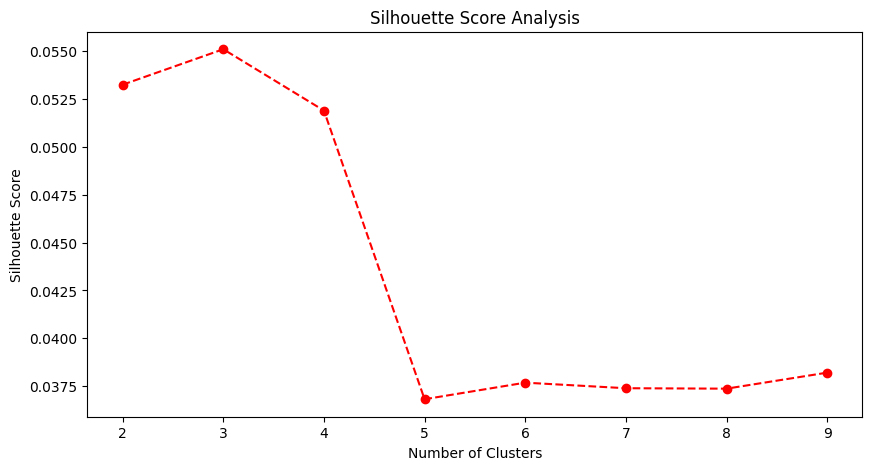

In [42]:
from sentence_transformers import SentenceTransformer
import tensorflow as tf
from sklearn.cluster import KMeans
tf.get_logger().setLevel('ERROR')  # Suppresses warnings

Tweets = Tweets_df["cleaned_tweet_text"].astype(str).tolist()
# Load pre-trained BERT model
model = SentenceTransformer("all-MiniLM-L6-v2")  # Efficient small model

# Generate embeddings
embeddings = model.encode(Tweets, show_progress_bar=True)
from sklearn.metrics import silhouette_score

# Try different cluster sizes
wcss = []
silhouette_scores = []
cluster_range = range(2, 10)  # Test clusters from 2 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)  # Within-cluster sum of squares
    silhouette_scores.append(silhouette_score(embeddings, kmeans.labels_))

# Plot WCSS (Elbow Method)
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker="o", linestyle="--", color="red")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis")
plt.show()


#### Observation:
The highest score is at K=3, meaning 3 clusters provide the best separation.

The best number of clusters (K) seems to be K=3 based on both the Elbow Method and Silhouette Score.
Assign labels to these clusters and analyze their meaning

In [50]:
# Apply kmeans clustering 
# Define optimal cluster number (adjust based on elbow method results)
num_clusters = 3  # Change this based on the elbow method result

# Apply KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embeddings)

# Add cluster labels to dataframe
Tweets_df["topic"] = clusters
# Assign tweets to their topics
for i in range(num_clusters):
    print(f"\nTopic {i}:")
    print(Tweets_df[Tweets_df["topic"] == i]["cleaned_tweet_text"].sample(5).tolist())  # Print sample tweets



Topic 0:
['industry party gsdm google grand affair sxsw', 'marissa mayer mention quotmobile cursorquot sxsw demo gen google map really impressive btw', 'rt mention sxsw google bing smackdown bloody banality guardian link mention', 'wish list tech ntn sxsw google apps help level playing field kid software home', 'following googlebing qa session sxsw great insight webmaster qagb']

Topic 1:
['look like laptop dock motorola atrix android phone att awesome sxsw link', 'sxflip breaking iphone version flipboard ther product sxsw yay', 'rt mention iphone apps grooving sxsw mention link', 'meant wish sxsw dyac stupid iphone', 'rt mention awesome new version mention iphone new web site coming sxsw want demo meet mention sxsw pls rt']

Topic 2:
['hmm ipad interface talk ux research hmm like sound politics html sxsw', 'ipad design headache tablet morning sxsw tapworthy', 'bout watch mention live sxsw apple store ipad w mention mention living vicariously buy', 'begin apple win sxsw link opening t

#### Observation:
Apple dominates conversations at SXSW, with discussions on iPads, pop-up stores, and branding.

Google is also a major player, with focus on Google Maps, augmented reality, and social media innovations.

Smartphones (Android vs. iPhone) and their accessories are a big topic, showing how users rely on mobile tech at events.

People are discussing tech trends, brand influence, and new product launches in a way that highlights consumer behavior and excitement at SXSW.

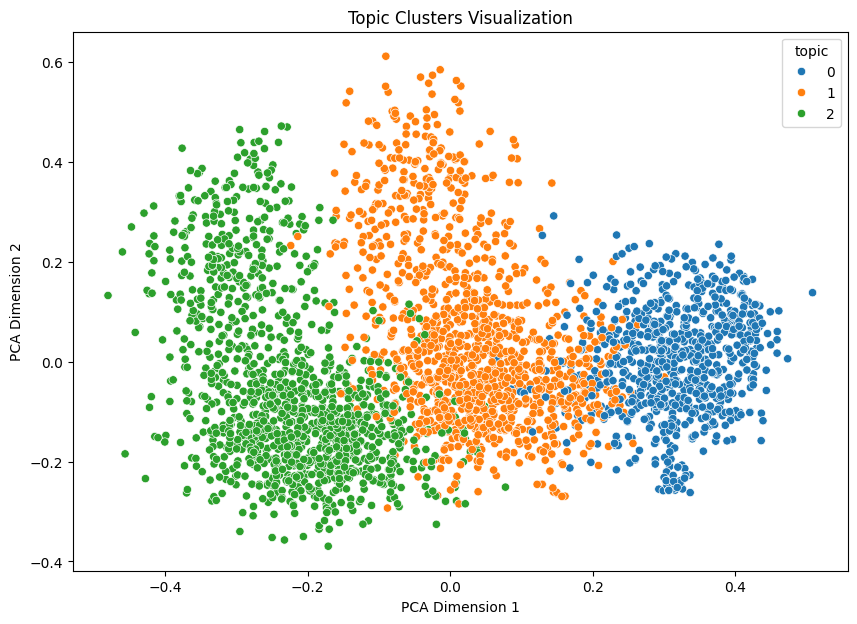

In [51]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Create a scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=Tweets_df["topic"], palette="tab10")
plt.title("Topic Clusters Visualization")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.show()


#### Binary Classification Model
We have classified the dataset and will apply SMOTE to address class imbalance. After resampling, we will train and evaluate multiple classification models, including Logistic Regression, Support Vector Classifier (SVC), K-Nearest Neighbors (KNN), and Naïve Bayes.

The model performance will be assessed using confusion matrices and a classification report, allowing us to compare results and select the most effective model for sentiment classification.

In [19]:
# Filter dataset for only "Positive emotion" or "Negative emotion"
Bi_tweets_df = Tweets_df[Tweets_df['brand_sentiment'].isin(['Positive emotion', 'Negative emotion'])]
Bi_tweets_df

,tweet_text,emotion_in_tweet_is_directed_at,brand_sentiment,tweet_length,cleaned_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,wesley g iphone hr tweeting riseaustin dead ne...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,jessedee know fludapp awesome ipadiphone app y...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,swonderlin wait ipad sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,sxsw hope year festival isnt crashy year iphon...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,sxtxstate great stuff fri sxsw marissa mayer g...
...,...,...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion,96,mention pr guy convinced switch iphone great s...
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion,70,quotpapyrussort like ipadquot nice lol sxsw la...
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion,133,diller say google tv quotmight run playstation...
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion,137,ive used camera iphone bc image stabilizer mod...


In [20]:
# Separate features & target variable
X = Bi_tweets_df["cleaned_tweet_text"]
y = Bi_tweets_df["brand_sentiment"]

# Convert text into numerical representation (TF-IDF)
vectorizer = TfidfVectorizer(stop_words="english")
X_tfidf = vectorizer.fit_transform(X)

# Convert sparse matrix to dense format for SMOTE
X_tfidf_dense = X_tfidf.toarray()

# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf_dense, y)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



#### Logistic regression

In [21]:
from sklearn.linear_model import LogisticRegression
# Train Logistic Regression model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9390243902439024
Classification Report:
                   precision    recall  f1-score   support

Negative emotion       0.92      0.96      0.94       518
Positive emotion       0.96      0.92      0.94       548

        accuracy                           0.94      1066
       macro avg       0.94      0.94      0.94      1066
    weighted avg       0.94      0.94      0.94      1066



#### Explanation:
The model is making correct predictions 93.3% of the time.

F1-scores are equal for both classes (0.94), meaning the model treats both positive and negative tweets fairly.

Precision (0.92): When the model predicts "Negative," it's correct 92% of the time.
Recall (0.96): It correctly identifies 96% of all actual negative tweets.

Positive Emotion:
Precision (0.96): When predicting "Positive," it's correct 96% of the time.
Recall (0.92): It correctly captures 92% of all actual positive tweets.

#### Training SVC, KNN and Multinomial NaiveBayes

In [22]:

# Split resampled data (SMOTE already applied)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define models (No need for TfidfVectorizer in pipeline)
models = {
    'SVC': SVC(kernel='linear', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate models
accuracies = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

    # Display results
    print(f"\n {model_name} Performance:\n")
    print(classification_report(y_test, y_pred))

# Print Model Comparison
print("\n Model Comparison:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")

# Determine the Best Model
best_model = max(accuracies, key=accuracies.get)
print(f"\n Best Performing Model: {best_model} with accuracy of {accuracies[best_model]:.2f}")


Training SVC...

 SVC Performance:

                  precision    recall  f1-score   support

Negative emotion       0.94      0.99      0.97       518
Positive emotion       0.99      0.95      0.97       548

        accuracy                           0.97      1066
       macro avg       0.97      0.97      0.97      1066
    weighted avg       0.97      0.97      0.97      1066


Training KNN...

 KNN Performance:

                  precision    recall  f1-score   support

Negative emotion       0.57      1.00      0.72       518
Positive emotion       1.00      0.28      0.44       548

        accuracy                           0.63      1066
       macro avg       0.78      0.64      0.58      1066
    weighted avg       0.79      0.63      0.58      1066


Training Naive Bayes...

 Naive Bayes Performance:

                  precision    recall  f1-score   support

Negative emotion       0.89      0.98      0.93       518
Positive emotion       0.98      0.88      0.93       


Training SVC...


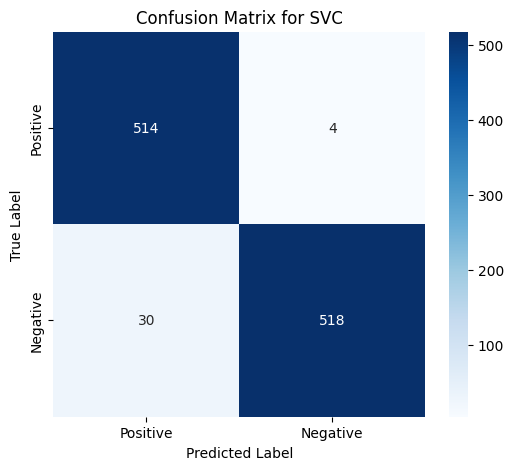


Training KNN...


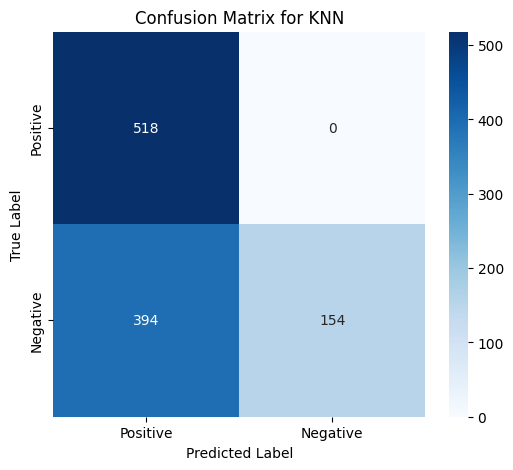


Training Naive Bayes...


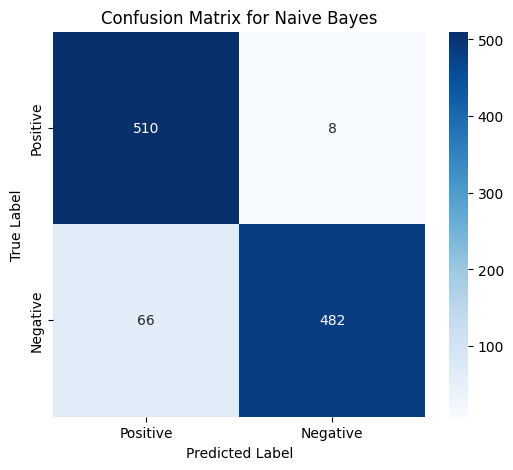


 Model Comparison:
SVC: 0.97
KNN: 0.63
Naive Bayes: 0.93

 Best Performing Model: SVC with accuracy of 0.97


In [23]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)  # Generate confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Train and evaluate each model
accuracies = {}
for model_name, model_pipeline in models.items():
    print(f"\nTraining {model_name}...")
    model_pipeline.fit(X_train, y_train)  # Train the model
    y_pred = model_pipeline.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracies[model_name] = accuracy  # Store the accuracy
    
    # Plot confusion matrix for each model
    plot_confusion_matrix(y_test, y_pred, model_name)

# Print out the accuracy for each model
print("\n Model Comparison:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")

# Determine the best performing model
best_model = max(accuracies, key=accuracies.get)
print(f"\n Best Performing Model: {best_model} with accuracy of {accuracies[best_model]:.2f}")


#### Multiclassifier model

Class distribution before SMOTE: Counter({0: 2664, 1: 518, 2: 91})
Class distribution after SMOTE: Counter({1: 2664, 0: 2664, 2: 2664})

Training SVC...

 SVC Performance:

                                    precision    recall  f1-score   support

                  Positive emotion       0.73      0.54      0.62       547
                  Negative emotion       0.62      0.65      0.63       526
No emotion toward brand or product       0.68      0.83      0.75       526

                          accuracy                           0.67      1599
                         macro avg       0.68      0.67      0.67      1599
                      weighted avg       0.68      0.67      0.67      1599



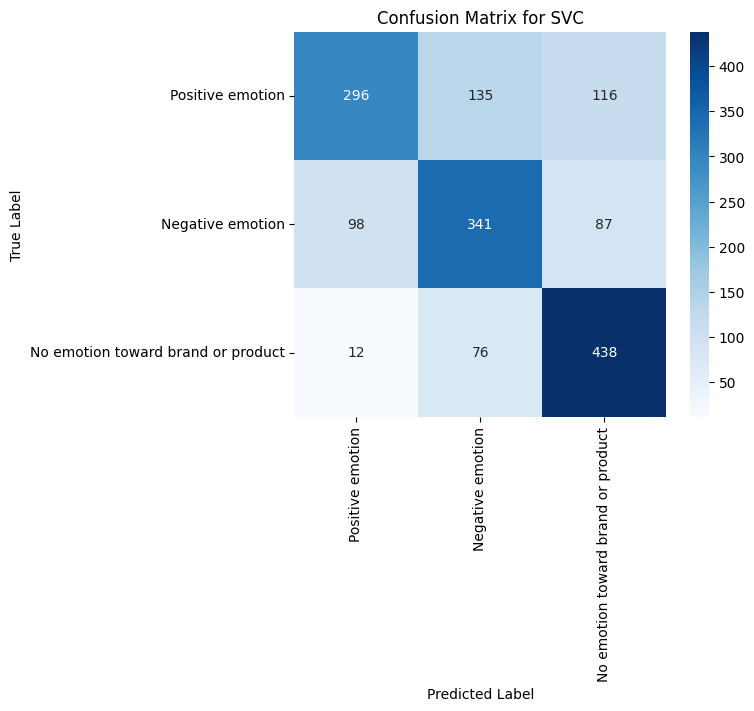


Training KNN...

 KNN Performance:

                                    precision    recall  f1-score   support

                  Positive emotion       0.90      0.64      0.75       547
                  Negative emotion       0.79      0.91      0.85       526
No emotion toward brand or product       0.86      0.98      0.91       526

                          accuracy                           0.84      1599
                         macro avg       0.85      0.84      0.84      1599
                      weighted avg       0.85      0.84      0.83      1599



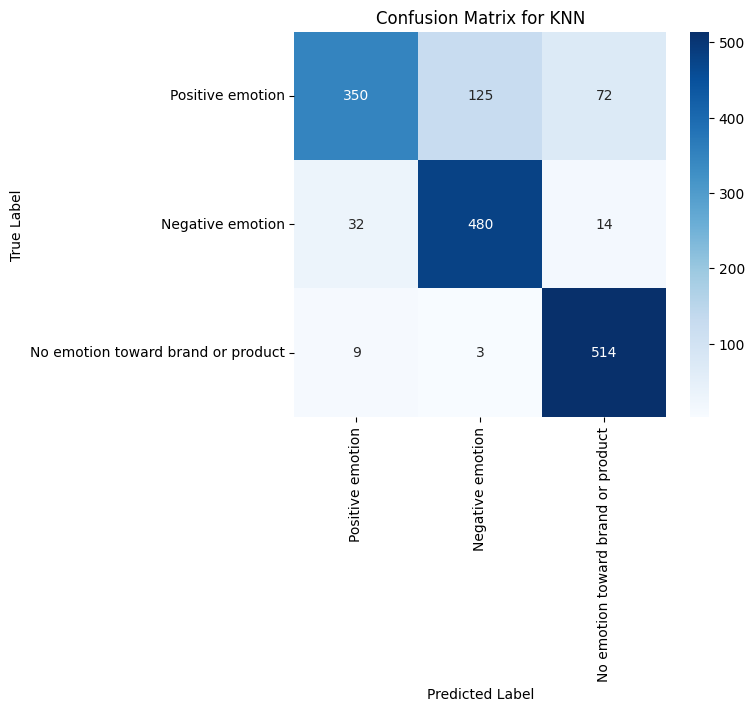


Training Naive Bayes...

 Naive Bayes Performance:

                                    precision    recall  f1-score   support

                  Positive emotion       0.70      0.48      0.57       547
                  Negative emotion       0.52      0.56      0.54       526
No emotion toward brand or product       0.58      0.71      0.64       526

                          accuracy                           0.59      1599
                         macro avg       0.60      0.59      0.58      1599
                      weighted avg       0.60      0.59      0.58      1599



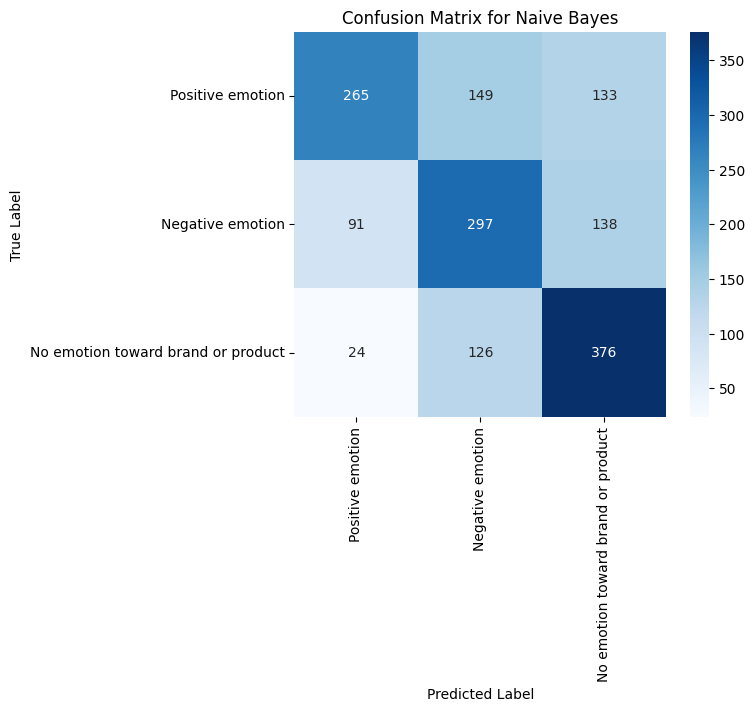


 Model Comparison:
SVC: 0.67
KNN: 0.84
Naive Bayes: 0.59

 Best Performing Model: KNN with accuracy of 0.84


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter


X = Tweets_df["cleaned_tweet_text"]  # Raw text
y = Tweets_df["brand_sentiment"]  # Labels

# Correct label mapping based on dataset values
label_mapping = {
    "Positive emotion": 0,
    "Negative emotion": 1,
    "No emotion toward brand or product": 2
}
y = y.map(label_mapping)


if y.isnull().sum() > 0:
    raise ValueError("Error: Some labels were not mapped correctly!")

# Convert text to numerical representation (TF-IDF)
vectorizer = TfidfVectorizer(stop_words="english", min_df=0.01, max_df=0.9)
X_tfidf = vectorizer.fit_transform(X)

# Print class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))

# Apply SMOTE (Now on numerical TF-IDF data)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Print class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define the models
models = {
    'SVC': SVC(kernel='linear', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': MultinomialNB()
}

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
                xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Train and evaluate models
accuracies = {}
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

    # Display results
    print(f"\n {model_name} Performance:\n")
    print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

# Print Model Comparison
print("\n Model Comparison:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")

# Determine the Best Model
best_model = max(accuracies, key=accuracies.get)
print(f"\n Best Performing Model: {best_model} with accuracy of {accuracies[best_model]:.2f}")



#### TUNING OUR BEST MODEL
KNN Performed well with an accuracy of 84%. we shall tune it for better results using GridsearchCV


Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

Optimized KNN Performance:

                                    precision    recall  f1-score   support

                  Positive emotion       0.90      0.71      0.79       547
                  Negative emotion       0.81      0.92      0.86       526
No emotion toward brand or product       0.89      0.97      0.93       526

                          accuracy                           0.86      1599
                         macro avg       0.87      0.86      0.86      1599
                      weighted avg       0.87      0.86      0.86      1599



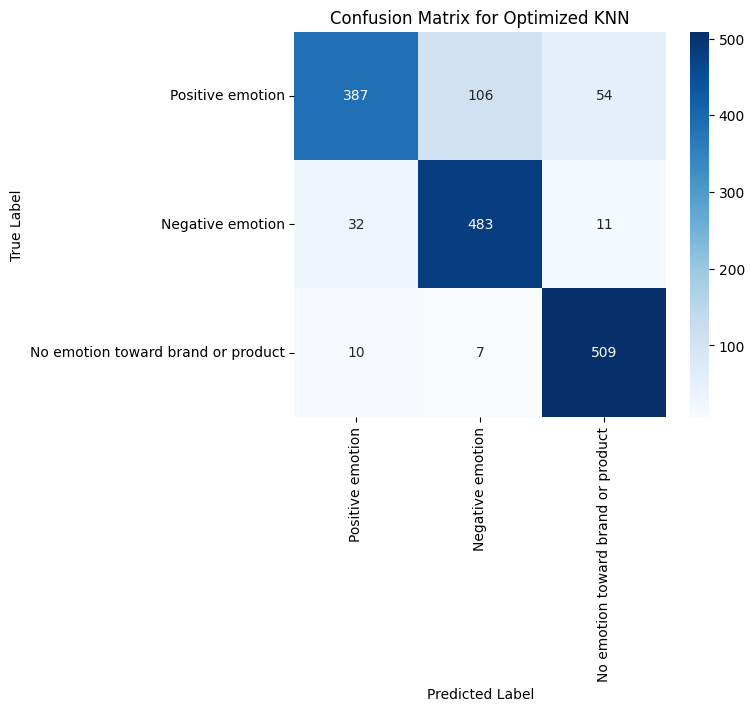


Final Optimized KNN Accuracy: 0.86


In [25]:

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters for KNN:", best_params)

# Train KNN with best parameters
best_knn = grid_search.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Evaluation metrics
print("\nOptimized KNN Performance:\n")
print(classification_report(y_test, y_pred_knn, target_names=label_mapping.keys()))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
                xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_knn, "Optimized KNN")

# Final accuracy
final_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"\nFinal Optimized KNN Accuracy: {final_accuracy:.2f}")

#### Explanation:
The model correctly classifies tweets 86% of the time.

Negative sentiment recall (92%) is very strong, ensuring that most negative tweets are correctly identified.

[==================================================] 100.0% 128.1/128.1MB downloaded


C:\Users\Administrator\anaconda3\envs\learn-env\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.3713 - loss: 1.1767 - val_accuracy: 0.7176 - val_loss: 1.0256
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4705 - loss: 1.0844 - val_accuracy: 0.5344 - val_loss: 1.0669
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3303 - loss: 1.1413 - val_accuracy: 0.2718 - val_loss: 1.1126
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3020 - loss: 1.0846 - val_accuracy: 0.4626 - val_loss: 1.0800
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3707 - loss: 1.1006 - val_accuracy: 0.4031 - val_loss: 1.0641
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.3168 - loss: 1.1042 - val_accuracy: 0.2580 - val_loss: 1.0838
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step

Classification Report:
                                    precision    recall  f1-score   support

                  Positive emotion       0.82      0.87      0.84       533
                  Negative

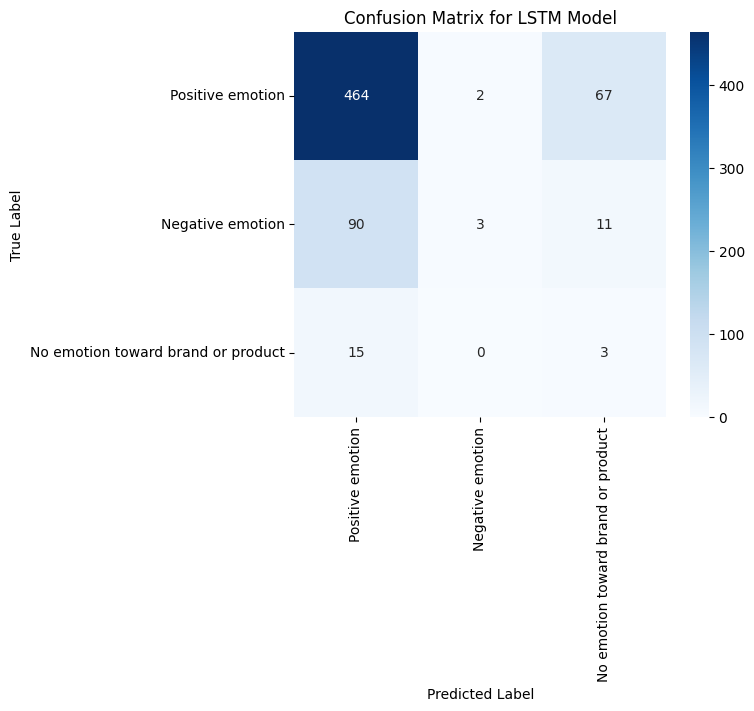

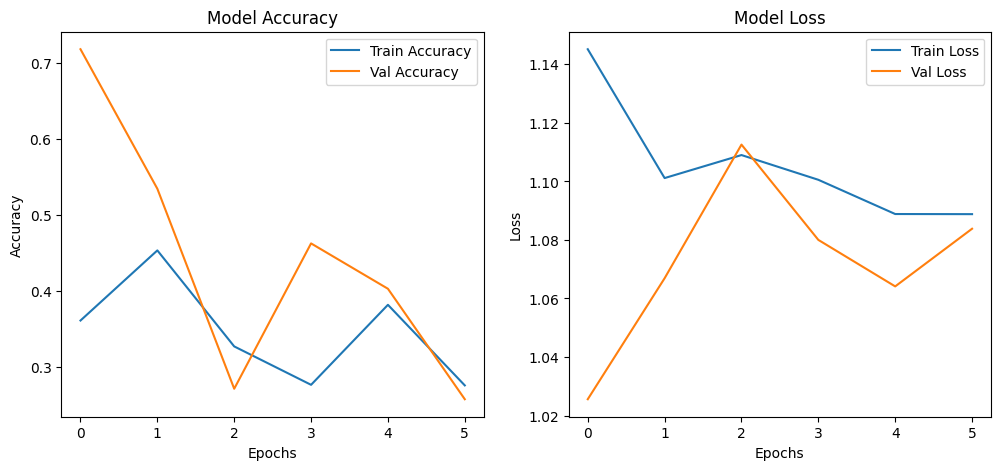

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, LayerNormalization, GlobalAveragePooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import gensim.downloader as api  # For GloVe embeddings
import tensorflow as tf

X = Tweets_df["cleaned_tweet_text"]
y = Tweets_df["brand_sentiment"]

# Correct label mapping based on dataset values
label_mapping = {
    "Positive emotion": 0,
    "Negative emotion": 1,
    "No emotion toward brand or product": 2
}
y = y.map(label_mapping).astype(int)  # Ensure integer format

# Ensure no NaN values remain
if y.isnull().sum() > 0:
    raise ValueError("Error: Some labels were not mapped correctly!")

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tokenization and Padding
MAX_VOCAB_SIZE = 20000  
MAX_SEQUENCE_LENGTH = 100 

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding="post", truncating="post")

# Convert labels to categorical (one-hot encoding)
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Compute Class Weights to Handle Imbalance
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Load GloVe Embeddings
glove_model = api.load("glove-wiki-gigaword-100")

# Create Embedding Matrix
embedding_matrix = np.zeros((MAX_VOCAB_SIZE, 100))
for word, i in tokenizer.word_index.items():
    if i < MAX_VOCAB_SIZE:
        if word in glove_model:
            embedding_matrix[i] = glove_model[word]
        else:
            embedding_matrix[i] = np.random.normal(scale=0.6, size=(100,))  # Handle OOV words

# Build Deep Learning Model (LSTM)
model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=100, weights=[embedding_matrix], 
              input_length=MAX_SEQUENCE_LENGTH, trainable=True),  # Allow fine-tuning
    Bidirectional(LSTM(128, return_sequences=True)),
    LayerNormalization(),
    Dropout(0.5),
    Bidirectional(LSTM(64, return_sequences=True)),
    LayerNormalization(),
    Dropout(0.5),
    Bidirectional(LSTM(32, return_sequences=False)),  #Ensures return_sequences=False
    Flatten(),  # Fix: Use Flatten instead of GlobalAveragePooling1D
    Dense(32, activation="relu"),
    Dropout(0.5),
    Dense(3, activation="softmax")  # 3 output neurons for 3 classes
])

# Compile Model
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=["accuracy"])

# Add Early Stopping to Prevent Overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Train Model
history = model.fit(X_train_pad, y_train_cat, validation_data=(X_test_pad, y_test_cat), 
                    epochs=30, batch_size=128, verbose=1, class_weight=class_weight_dict, 
                    callbacks=[early_stopping])

# Evaluate Model
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name="LSTM Model"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# Plot Training Loss & Accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.title("Model Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title("Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

plot_training_history(history)


#### Explanation:
Positive Emotion is well classified

Precision = 0.82 (82% of predicted positive sentiments are correct)
Recall = 0.87 (87% of actual positive sentiments are identified correctly)
F1-score = 0.84 (good balance between precision & recall)
"Negative Emotion" has poor recall

Precision = 0.60 (60% of predicted negatives are correct)
Recall = 0.03 (only 3% of actual negative emotions are identified)
This suggests that the model misclassifies negative tweets as positive or neutral.
"No Emotion toward brand or product" is also poorly classified

Precision = 0.04, Recall = 0.17
The model is failing to correctly identify these cases.


In [31]:
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Embedding, LSTM, Dense, Bidirectional, Dropout, LayerNormalization, 
                                     Input)
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import gensim.downloader as api  # For GloVe embeddings


Class Distribution in Training Data:
brand_sentiment
0    0.813932
1    0.158265
2    0.027803
Name: proportion, dtype: float64


C:\Users\Administrator\anaconda3\envs\learn-env\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.3253 - loss: 1.1656 - val_accuracy: 0.0275 - val_loss: 1.1290 - learning_rate: 5.0000e-04
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.4064 - loss: 1.0375 - val_accuracy: 0.3679 - val_loss: 1.0967 - learning_rate: 5.0000e-04
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3323 - loss: 1.1187 - val_accuracy: 0.1374 - val_loss: 1.1816 - learning_rate: 5.0000e-04
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.2383 - loss: 1.1063 - val_accuracy: 0.4931 - val_loss: 1.0900 - learning_rate: 5.0000e-04
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4880 - loss: 1.0701 - val_accuracy: 0.6412 - val_loss: 0.9695 - learning_rate: 5.0000e-04
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5855 - loss: 1.0278 - val_accuracy: 0.5679 - val_loss: 0.9758 - learning_rate: 5.0000e-04
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.6248 - loss:

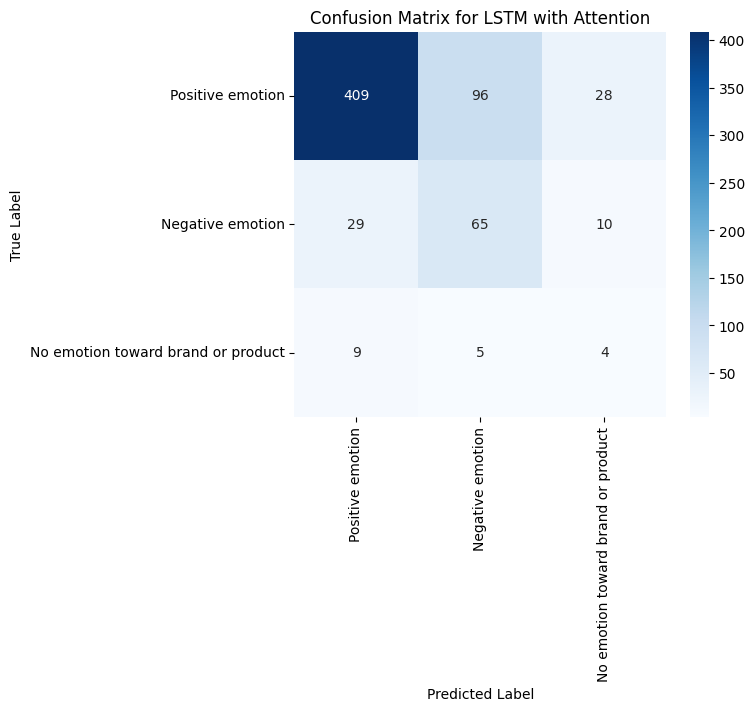

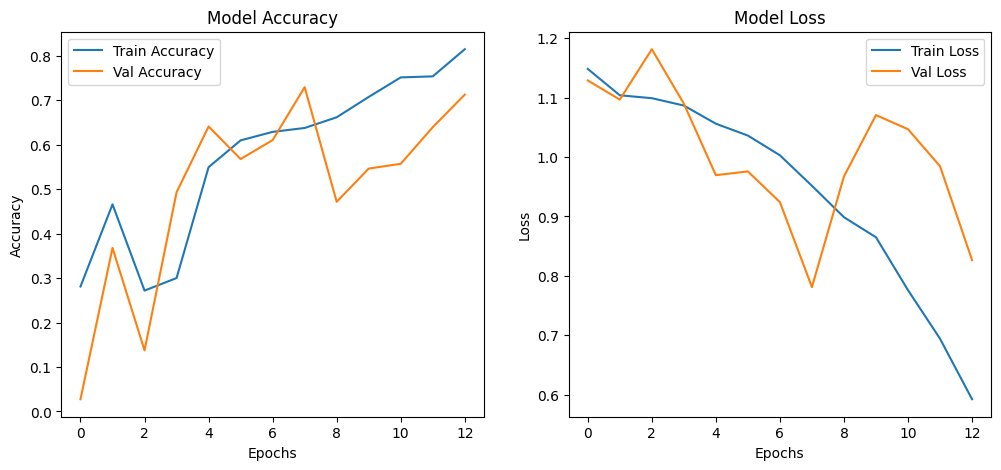

In [32]:
# Check class distribution
print("Class Distribution in Training Data:")
print(y.value_counts(normalize=True))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Tokenization and Padding
MAX_VOCAB_SIZE = 20000  # Increased vocabulary size
MAX_SEQUENCE_LENGTH = 100  # Maximum number of words per tweet

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding="post", truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding="post", truncating="post")

# Convert labels to categorical (one-hot encoding)
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Compute Class Weights to Handle Imbalance
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(enumerate(class_weights))

# Load GloVe Embeddings
glove_model = api.load("glove-wiki-gigaword-100")

# Create Embedding Matrix
embedding_matrix = np.zeros((MAX_VOCAB_SIZE, 100))
for word, i in tokenizer.word_index.items():
    if i < MAX_VOCAB_SIZE:
        if word in glove_model:
            embedding_matrix[i] = glove_model[word]
        else:
            embedding_matrix[i] = np.random.normal(scale=0.6, size=(100,))  # Handle OOV words

# Define Attention Mechanism
class AttentionLayer(tf.keras.layers.Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(input_shape[-1],), initializer="zeros", trainable=True)
        self.V = self.add_weight(shape=(input_shape[-1], 1), initializer="random_normal", trainable=True)

    def call(self, inputs):
        score = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        attention_weights = tf.nn.softmax(tf.tensordot(score, self.V, axes=1), axis=1)
        return tf.reduce_sum(inputs * attention_weights, axis=1)

# Build Deep Learning Model (LSTM with Attention)
input_layer = Input(shape=(MAX_SEQUENCE_LENGTH,))
embedding_layer = Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=100, weights=[embedding_matrix], 
                            input_length=MAX_SEQUENCE_LENGTH, trainable=True)(input_layer)
lstm_1 = Bidirectional(LSTM(128, return_sequences=True))(embedding_layer)
layer_norm_1 = LayerNormalization()(lstm_1)
dropout_1 = Dropout(0.5)(layer_norm_1)
lstm_2 = Bidirectional(LSTM(64, return_sequences=True))(dropout_1)
layer_norm_2 = LayerNormalization()(lstm_2)
dropout_2 = Dropout(0.5)(layer_norm_2)
lstm_3 = Bidirectional(LSTM(32, return_sequences=True))(dropout_2)

attention_output = AttentionLayer()(lstm_3)  # Applying Attention
dense_layer = Dense(32, activation="relu")(attention_output)
dropout_3 = Dropout(0.5)(dense_layer)
output_layer = Dense(3, activation="softmax")(dropout_3)  # 3 output neurons for 3 classes

model = Model(inputs=input_layer, outputs=output_layer)

# Compile Model
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=["accuracy"])

# Add Early Stopping & Learning Rate Scheduler
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)

# Train Model
history = model.fit(X_train_pad, y_train_cat, validation_data=(X_test_pad, y_test_cat), 
                    epochs=30, batch_size=128, verbose=1, class_weight=class_weight_dict, 
                    callbacks=[early_stopping, reduce_lr])

# Evaluate Model
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, model_name="LSTM with Attention"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# Plot Training Loss & Accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Val Accuracy")
    plt.title("Model Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Val Loss")
    plt.title("Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

plot_training_history(history)


#### Observation:
Training Accuracy is improving steadily indicating the model is learning from the training data.
Validation Accuracy fluctuates but improves. This indicates the model is generalizing but may be unstable.
Training Loss is consistently decreasing Suggesting the model is optimizing well on the training set.
Validation Loss is fluctuating Early on, validation loss is higher than training loss.
It decreases but then fluctuates

#### Recommendation from bert analysis
Apple should leverage its strong SXSW presence to reinforce brand loyalty and product adoption.

Google could improve engagement by capitalizing on its innovations, especially in augmented reality and maps.

Brands should explore more interactive experiences at SXSW, as engagement seems high around pop-up stores and product launches.


#### Recommendation from wordcloud visualization

- Apple and Google need to investigate potential negative feedback about their products (iPad, iPhone, Android).
- SXSW might have generated negative press or customer experiences.
- Product design and usability issues seem to be a concern (e.g., "design headache").